In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#references 
#https://scikit-learn.org/stable/modules/grid_search.html

#read in dfs
test_df = pd.read_csv("Rep5Test.csv")
train_df = pd.read_csv("Rep5Train.csv")

#data cleaning
#dropping id column, not necessary
test_df = test_df.drop("ID", axis = 1)
train_df = train_df.drop("ID", axis = 1)

#numerical imputation
#categorical imputation
from sklearn.impute import SimpleImputer

def missing_imputation(df_hr):
    categorical=df_hr.select_dtypes(exclude=[np.number])
    numerical=df_hr.select_dtypes(include=[np.number])
    num=SimpleImputer(strategy='mean')
    cat=SimpleImputer(strategy='most_frequent')
    categorical_imputed=cat.fit_transform(categorical)
    numerical_imputed=num.fit_transform(numerical)
    categorical_imputed=pd.DataFrame(categorical_imputed,columns=categorical.columns)
    numerical_imputed=pd.DataFrame(numerical_imputed,columns=numerical.columns)
    hr_imputed=pd.concat([categorical_imputed,numerical_imputed],axis=1)
    return hr_imputed

test_df = missing_imputation(test_df)
train_df = missing_imputation(train_df)
print(train_df.isnull().sum())



Gender             0
Ever_Married       0
Graduated          0
Profession         0
Spending_Score     0
Var_1              0
Segmentation       0
Age                0
Work_Experience    0
Family_Size        0
dtype: int64


In [2]:
#encoding for categorical variables
#scaling for numerical values

from sklearn.preprocessing import OrdinalEncoder

#ordinal encoding for profession, var_1, and segmentation
categorical_columns = ['Profession', 'Var_1','Segmentation']
encoder=OrdinalEncoder()
for column in categorical_columns:
    train_df[column]=encoder.fit_transform(train_df[[column]])
    test_df[column]=encoder.fit_transform(test_df[[column]])


#nominal encoding
columns_to_encode = ['Spending_Score']
encoded_train = pd.get_dummies(train_df, columns=columns_to_encode)
encoded_test = pd.get_dummies(test_df, columns=columns_to_encode)
print(encoded_train)

#drop original columns
train_df=encoded_train
test_df=encoded_test

train_df=train_df.drop("Spending_Score",axis=1)
test_df=test_df.drop("Spending_Score",axis=1)

      Gender Ever_Married Graduated  Profession  Var_1  Segmentation   Age  \
0       Male           No        No         5.0    3.0           3.0  22.0   
1     Female          Yes       Yes         2.0    3.0           0.0  38.0   
2     Female          Yes       Yes         2.0    5.0           1.0  67.0   
3       Male          Yes       Yes         7.0    5.0           1.0  67.0   
4     Female          Yes       Yes         3.0    5.0           0.0  40.0   
...      ...          ...       ...         ...    ...           ...   ...   
8063    Male           No        No         0.0    0.0           3.0  22.0   
8064    Male           No        No         4.0    3.0           3.0  35.0   
8065  Female           No       Yes         5.0    5.0           3.0  33.0   
8066  Female           No       Yes         5.0    5.0           1.0  27.0   
8067    Male          Yes       Yes         4.0    3.0           1.0  37.0   

      Work_Experience  Family_Size  Spending_Score_Average  \
0

KeyError: "['Spending_Score'] not found in axis"

In [3]:
#switching gender, ever_married, graduated to binary columns

train_df.loc[train_df['Gender'] == "Male", "Gender"] = 0
train_df.loc[train_df['Gender'] == "Female", "Gender"] = 1
test_df.loc[test_df['Gender'] == "Male", "Gender"] = 0
test_df.loc[test_df['Gender'] == "Female", "Gender"] = 1

train_df.loc[train_df['Ever_Married'] == "No", "Ever_Married"] = 0
train_df.loc[train_df['Ever_Married'] == "Yes", "Ever_Married"] = 1
test_df.loc[test_df['Ever_Married'] == "No", "Ever_Married"] = 0
test_df.loc[test_df['Ever_Married'] == "Yes", "Ever_Married"] = 1

train_df.loc[train_df['Graduated'] == "No", "Graduated"] = 0
train_df.loc[train_df['Graduated'] == "Yes", "Graduated"] = 1
test_df.loc[test_df['Graduated'] == "No", "Graduated"] = 0
test_df.loc[test_df['Graduated'] == "Yes", "Graduated"] = 1

In [4]:
train_df

,Gender,Ever_Married,Graduated,Profession,Var_1,Segmentation,Age,Work_Experience,Family_Size,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,0,0,0,5.0,3.0,3.0,22.0,1.000000,4.0,0,0,1
1,1,1,1,2.0,3.0,0.0,38.0,2.641663,3.0,1,0,0
2,1,1,1,2.0,5.0,1.0,67.0,1.000000,1.0,0,0,1
3,0,1,1,7.0,5.0,1.0,67.0,0.000000,2.0,0,1,0
4,1,1,1,3.0,5.0,0.0,40.0,2.641663,6.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0,0,0,0.0,0.0,3.0,22.0,0.000000,7.0,0,0,1
8064,0,0,0,4.0,3.0,3.0,35.0,3.000000,4.0,0,0,1
8065,1,0,1,5.0,5.0,3.0,33.0,1.000000,1.0,0,0,1
8066,1,0,1,5.0,5.0,1.0,27.0,1.000000,4.0,0,0,1


<AxesSubplot:>

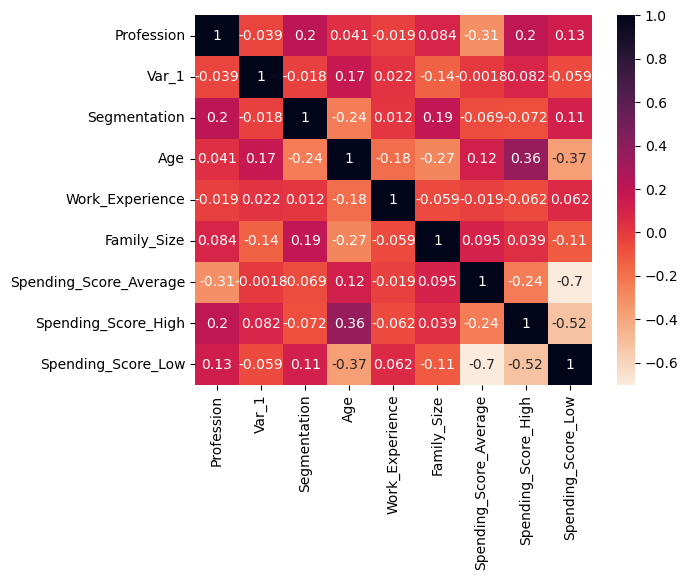

In [5]:
#correlation matrix in form of heatmap

cmap = sns.cm.rocket_r
sns.heatmap(train_df.corr(), annot=True, cmap=cmap)

In [6]:
#scaling values
#features to be scaled (age, work_experience)
from sklearn.preprocessing import StandardScaler

#create scaler object
scaler = StandardScaler()

#separating out X and y

y_train = train_df["Segmentation"]
y_test = test_df["Segmentation"]
train_df_new = train_df.drop("Segmentation", axis=1)
test_df_new = test_df.drop("Segmentation", axis=1)


X_train = train_df_new.values
X_test = test_df_new.values
y_train = y_train.values
y_test = y_test.values

#copy datasets to ensure nothing is changed
scaled_copy_train = X_train.copy()
scaled_copy_test = X_test.copy()

#identify columns to scale
columns_to_scale = [5, 6]

#scale the data
scaled_copy_train[:, columns_to_scale] = scaler.fit_transform(X_train[:, columns_to_scale])
scaled_copy_test[:, columns_to_scale] = scaler.fit_transform(X_test[:, columns_to_scale])

In [ ]:
#splitting data up




In [10]:
#SVC linear

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVC model with a linear kernel
#specify one vs rest and kernel type
linear_model = SVC(kernel='linear', decision_function_shape='ovr')

#train model on scaled, cleaned data
linear_model.fit(scaled_copy_train, y_train)

#predict 
y_pred_linear = linear_model.predict(scaled_copy_test)

# Calculate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f'Accuracy (Linear Kernel): {accuracy_linear * 100:.2f}%')

Accuracy (Linear Kernel): 33.19%


In [12]:
#SVC Poly model
#specify one vs rest and kernel type
poly_model = SVC(kernel='poly', degree = 3, decision_function_shape='ovr')

#train model on scaled, cleaned data
poly_model.fit(scaled_copy_train, y_train)

#predict
y_pred_poly = poly_model.predict(scaled_copy_test)

#create accuracy score
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f'Accuracy (Linear Kernel): {accuracy_poly * 100:.2f}%')

Accuracy (Linear Kernel): 33.27%


In [13]:

#SVC Rbf
#specify one vs rest and kernel type
rbf_model = SVC(kernel='rbf', decision_function_shape='ovr')

##train model on scaled, cleaned data
rbf_model.fit(scaled_copy_train, y_train)

#predict
y_pred_rbf = rbf_model.predict(scaled_copy_test)

#create accuracy score
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'Accuracy (Linear Kernel): {accuracy_rbf * 100:.2f}%')

Accuracy (Linear Kernel): 32.20%


Accuracy (Gini): 30.87%


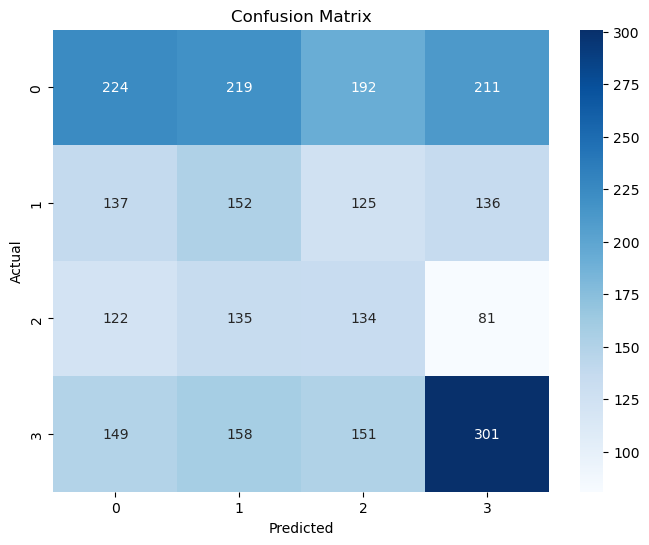

In [17]:
#DecisionTree gini

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

gini_model = DecisionTreeClassifier(criterion='gini')

#train decision tree classifier
gini_model.fit(scaled_copy_train, y_train)

#predict
y_pred_gini = gini_model.predict(scaled_copy_test)

# Calculate accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f'Accuracy (Gini): {accuracy_gini * 100:.2f}%')

#Gini classification knowledge 

cm = confusion_matrix(y_test, y_pred_gini)

# Create a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
#Decision Tree entropy model

entropy_model = DecisionTreeClassifier(criterion='entropy')

#train decision tree classifier
entropy_model.fit(scaled_copy_train, y_train)

#predict
y_pred_entropy = entropy_model.predict(scaled_copy_test)

# Calculate accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f'Accuracy (Entropy): {accuracy_entropy * 100:.2f}%')

Accuracy (Entropy): 31.06%


In [19]:
#Post GridSearch CV linear

from sklearn.model_selection import GridSearchCV
# Initialize the SVC model with a linear kernel
#specify one vs rest and kernel type
linear_model = SVC(kernel='linear', decision_function_shape='ovr')

#identify hyper parameters
param_grid = {'C': [.1, 1, 10],
              'gamma': [0.01, 0.1, 1]}

# Initialize GridSearchCV, fit to linear model and hyperparameters
grid_search = GridSearchCV(linear_model, param_grid, cv=5)

grid_search.fit(scaled_copy_train, y_train)

#predict 

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_linear = best_model.predict(scaled_copy_test)

# Calculate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f'Accuracy (Linear Kernel): {accuracy_linear * 100:.2f}%')

KeyboardInterrupt: 

In [ ]:
#Grid search redo poly

poly_model = SVC()

#identify hyper parameters
param_grid = {'kernel': ['poly'], 
                'C': [.1, 1, 10],
              'gamma': [0.01, 0.1, 1]}

# Initialize GridSearchCV, fit to linear model and hyperparameters
grid_search = GridSearchCV(poly_model, param_grid, cv=5)

grid_search.fit(scaled_copy_train, y_train)

#predict 

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_poly = best_model.predict(scaled_copy_test)

# Calculate accuracy
accuracy_poly = accuracy_score(y_test, y_poly_linear)
print(f'Accuracy (Linear Kernel): {accuracy_poly * 100:.2f}%')

In [24]:
#RBF grid search

rbf_model = SVC()

#identify hyper parameters
param_grid = {'C': [.1, 1, 10],
              'gamma': [0.01, 0.1, 1]}

# Initialize GridSearchCV, fit to linear model and hyperparameters
grid_search = GridSearchCV(rbf_model, param_grid, cv=5)

grid_search.fit(scaled_copy_train, y_train)

#predict 

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_rbf = best_model.predict(scaled_copy_test)

# Calculate accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'Accuracy (Linear Kernel): {accuracy_rbf * 100:.2f}%')

KeyboardInterrupt: 

In [22]:
#DecisionTree Grid search

model = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10, 15]}

grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV object
grid_search.fit(scaled_copy_train, y_train)

# Access the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_dc = best_model.predict(scaled_copy_test)

accuracy_entropy = accuracy_score(y_test, y_pred_dc)
print(f'Accuracy with best model: {accuracy_entropy * 100:.2f}%')
print(best_model)

Accuracy (Entropy): 33.88%
DecisionTreeClassifier(max_depth=5)


In [26]:
#ALL SVC

model = SVC()

#Define the hyperparameter grid and kernel types
param_grid = {'kernel': ['linear', 'poly', 'rbf'],
              'C': [0.1, 1, 10],
              'gamma': [0.01, 0.1, 1]}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV object
grid_search.fit(scaled_copy_train, y_train)

# Access the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_svc = best_model.predict(scaled_copy_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy with best model: {accuracy_svc * 100:.2f}%')
print(best_model)

KeyboardInterrupt: 

#SUMMARY
DISCLAIMER: 

I was having trouble getting my GridSearch to evaluate. I tried many different combinations to get it to actually work and nothing was really working. Even after waiting for ~20 minutes for execution for each cell, there was no output. I tried to troubleshoot and unfortunately didn't really get anywhere on StackOverflow. Going to take a closer look at it during the week.

Data Cleaning and Preparation

In cleaning and preparing the data for the pipelines, I inputed null values based on the mean for numerical features and the mode for categorical features. Then I went on to change several features into binary categories. I utilized one hot encoding for spending type and ordinal encoding for several other features, including the target variable. From there, I standardized the only two numeric features in the dataset and went on to split the data up based on target and indepdenent variables.

After cleaning and preparation, I utilized three SVC models and two DecisionTreeModels. For the most part, none of these models were particularly successful at accurately classifying the customer segments based on the training data. The highest accuracy score was from the poly SVC model, though RBF was relatively close as well.

If I was successful with GridSearch, I would have been able to plot the differences between the models prior to GS and post GS to evaluate the success of it. I would have expected the GridSearch accuracies to be greater, though not by a subsantial margin to the relateively poor classification strength of the models that I evaluated today. 

Overall, this was a great assignment to work with new libraries, namely GridSearch though I wasn't successful with it. This assignment. 

In terms of help on this assignemnt, I utilized sci-kit, numpy, and pandas documentation for reference. I also used ChatGPT to build frameworks to work off of. 